# Postfinance Challenge

<table><tr>
<td><img src="challenge_pix/1.png" width="100%"></td>
<td><img src="challenge_pix/2.png" width="100%"></td>
</tr><tr>
<td><img src="challenge_pix/3.png" width="100%"></td>
<td><img src="challenge_pix/4.png" width="100%"></td>
</tr></table>

## Requirenments

```bash
!pip3 install pandas
!pip3 install numpy
!pip3 install scipy
!pip3 install pprint
!pip3 install matplotlib
```

In [1]:
import pandas as pd
import numpy as np
from dataclasses import make_dataclass
import itertools
from scipy.spatial.distance import squareform, pdist
from pprint import pprint
import matplotlib.pyplot as plt

## Data

### Define Points

In [2]:
Point = make_dataclass("Point", [("name", str), ("x", int), ("y", int)])
points = pd.DataFrame([
        Point('s1_PFHQ',  3, 5),
        Point('s1_A1',   10, 8),
        Point('s1_A2',   11, 3),
        Point('s1_A3',   14, 7),
        Point('s1_A4',   15, 1),
        Point('s1_A5',   18, 5),
        
        Point('s2_PC',   22, 2),
        Point('s2_A1',   26, 4),
        Point('s2_A2',   35, 8),
        Point('s2_A3',   26, 9),
        Point('s2_A4',   28, 13),
        Point('s2_A5',   19, 9),
        
        Point('s3_EDU',  19, 13),
        Point('s3_A1',   21, 15),
        Point('s3_A2',   24, 17),
        Point('s3_A3',   30, 15),
        Point('s3_A4',   34, 17),
        Point('s3_A5',   46, 15),

        Point('s4_DSD',  38, 14),
        Point('s4_A1',   42, 13),
        Point('s4_A2',   41,  2),
        Point('s4_A3',   46,  9),
        Point('s4_A4',   48,  3),
        Point('s4_A5',   51, 14),
   
        Point('end',     54,  8)
    ])
#pprint(points)

### Distance between Points
Build Matrix to set all point distances in relation

In [3]:
points_distances = pd.DataFrame(squareform(pdist(points.iloc[:, 1:])), columns=points.name.unique(), index=points.name.unique())
pprint(points_distances)

           s1_PFHQ      s1_A1      s1_A2      s1_A3      s1_A4      s1_A5  \
s1_PFHQ   0.000000   7.615773   8.246211  11.180340  12.649111  15.000000   
s1_A1     7.615773   0.000000   5.099020   4.123106   8.602325   8.544004   
s1_A2     8.246211   5.099020   0.000000   5.000000   4.472136   7.280110   
s1_A3    11.180340   4.123106   5.000000   0.000000   6.082763   4.472136   
s1_A4    12.649111   8.602325   4.472136   6.082763   0.000000   5.000000   
s1_A5    15.000000   8.544004   7.280110   4.472136   5.000000   0.000000   
s2_PC    19.235384  13.416408  11.045361   9.433981   7.071068   5.000000   
s2_A1    23.021729  16.492423  15.033296  12.369317  11.401754   8.062258   
s2_A2    32.140317  25.000000  24.515301  21.023796  21.189620  17.262677   
s2_A3    23.345235  16.031220  16.155494  12.165525  13.601471   8.944272   
s2_A4    26.248809  18.681542  19.723083  15.231546  17.691806  12.806248   
s2_A5    16.492423   9.055385  10.000000   5.385165   8.944272   4.123106   

### get distance between two points

In [4]:
# pprint(pg1_distances.loc['s1_PFHQ']['s1_A1'])

# define all Waypoints
this defines all possible paths

In [5]:
WayPoint = make_dataclass('WayPoint', [('origin', str), ('target', str)])
wayPoints = pd.DataFrame(
    [
        WayPoint('s1_PFHQ', 's1_A1'),
        WayPoint('s1_PFHQ', 's1_A2'),
        WayPoint('s1_A1', 's1_A3'),
        WayPoint('s1_A2', 's1_A4'),
        WayPoint('s1_A2', 's1_A5'),
        WayPoint('s1_A3', 's1_A5'),
        WayPoint('s1_A4', 's2_PC'),
        WayPoint('s1_A5', 's2_PC'),
        
        WayPoint('s2_PC', 's2_A1'),
        WayPoint('s2_PC', 's2_A3'),
        WayPoint('s2_A1', 's2_A2'),
        WayPoint('s2_A2', 's2_A3'),
        WayPoint('s2_A2', 's2_A4'),
        WayPoint('s2_A3', 's2_A4'),
        WayPoint('s2_A3', 's2_A5'),
        WayPoint('s2_A4', 's3_EDU'),
        WayPoint('s2_A5', 's3_EDU'),
        
        WayPoint('s3_EDU', 's3_A1'),
        WayPoint('s3_A1',  's3_A2'),
        WayPoint('s3_A1',  's3_A2'),
        WayPoint('s3_A2',  's3_A3'),
        WayPoint('s3_A2',  's3_A4'),
        WayPoint('s3_A3',  's4_DSD'),
        WayPoint('s3_A4',  's3_A5'),
        WayPoint('s3_A5',  's4_DSD'),
        
        WayPoint('s4_DSD', 's4_A1'),
        WayPoint('s4_A1', 's4_A2'),
        WayPoint('s4_A1', 's4_A5'),
        WayPoint('s4_A2', 's4_A3'),
        WayPoint('s4_A2', 's4_A4'),
        WayPoint('s4_A3', 'end'),
        WayPoint('s4_A4', 'end'),
        WayPoint('s4_A5', 'end') 
    ])

### calculate distance two Waypoints

In [6]:
def distance_race (row):
    return points_distances.loc[row['origin']][row['target']]
    
wayPoints['distance'] =  wayPoints.apply(lambda row: distance_race(row), axis=1)

pprint(wayPoints.head(5))

    origin target  distance
0  s1_PFHQ  s1_A1  7.615773
1  s1_PFHQ  s1_A2  8.246211
2    s1_A1  s1_A3  4.123106
3    s1_A2  s1_A4  4.472136
4    s1_A2  s1_A5  7.280110


### get all paths // list all possible ways 

In [7]:
def recursive_runner(pos):
    global wayPoints
    childNodes = wayPoints[wayPoints['origin'] == pos].target.to_list() 

    if len(childNodes) == 0:
        return [[pos]]

    paths = []
    for child in childNodes:
        for path in recursive_runner(child):
            paths.append([pos] + path)
    return paths
        
pos = 's1_PFHQ'
paths = recursive_runner(pos)

#pprint(paths)


### find the shortest path

In [8]:
Way = make_dataclass('Way', [('fullPath', list), ('hops', int), ('waypoints', list),('distance_waypoints', list), ('distance', float)])
allWays = pd.DataFrame(columns=['fullPath', 'hops', 'waypoints', 'distance_waypoints', 'distance'])

distList = []

for p in paths:
    
    #split path in waystops, start->A1, A1->A3
    path_waypoints = []
    list_cycle = itertools.cycle(p)
    last = next(list_cycle)
    current = ''
    while current != "end":
        current = next(list_cycle)
        path_waypoints.append([last, current])
        last = current
        
    #calculate distance for each section
    distance_sum = 0
    distance_waypoints = []
    for section in path_waypoints:
        add_distance = points_distances.loc[section[0]][section[1]]
        distance_sum = distance_sum + add_distance
        distance_waypoints.append(add_distance)
        
    #merge datasets
    df = pd.DataFrame([Way(p, len(p), path_waypoints, distance_waypoints, distance_sum)] )
    allWays = allWays.append(df)


allWays["fullPathString"] = allWays["fullPath"].str.join("->") 
allWays = allWays.drop_duplicates(subset=['fullPathString'])

allWays = allWays.sort_values(by=['distance'])
shortest = allWays.head(100)

for i, s in shortest.iterrows():
    print('***')
    print("Path: \t\t" + str(s['fullPathString']))
    print("Hops: \t\t" + str(s['hops']))
    print("Distance: \t" + str(s['distance'])+ " km")
    

***
Path: 		s1_PFHQ->s1_A2->s1_A4->s2_PC->s2_A3->s2_A5->s3_EDU->s3_A1->s3_A2->s3_A3->s4_DSD->s4_A1->s4_A5->end
Hops: 		14
Distance: 	79.55915893149887 km
***
Path: 		s1_PFHQ->s1_A2->s1_A5->s2_PC->s2_A3->s2_A5->s3_EDU->s3_A1->s3_A2->s3_A3->s4_DSD->s4_A1->s4_A5->end
Hops: 		14
Distance: 	80.29606505391433 km
***
Path: 		s1_PFHQ->s1_A1->s1_A3->s1_A5->s2_PC->s2_A3->s2_A5->s3_EDU->s3_A1->s3_A2->s3_A3->s4_DSD->s4_A1->s4_A5->end
Hops: 		15
Distance: 	80.98075859987964 km
***
Path: 		s1_PFHQ->s1_A2->s1_A4->s2_PC->s2_A3->s2_A4->s3_EDU->s3_A1->s3_A2->s3_A3->s4_DSD->s4_A1->s4_A5->end
Hops: 		14
Distance: 	82.03129488649844 km
***
Path: 		s1_PFHQ->s1_A2->s1_A5->s2_PC->s2_A3->s2_A4->s3_EDU->s3_A1->s3_A2->s3_A3->s4_DSD->s4_A1->s4_A5->end
Hops: 		14
Distance: 	82.7682010089139 km
***
Path: 		s1_PFHQ->s1_A1->s1_A3->s1_A5->s2_PC->s2_A3->s2_A4->s3_EDU->s3_A1->s3_A2->s3_A3->s4_DSD->s4_A1->s4_A5->end
Hops: 		15
Distance: 	83.45289455487921 km
***
Path: 		s1_PFHQ->s1_A2->s1_A4->s2_PC->s2_A3->s2_A5->s3_EDU-

## Visualisation

### Points

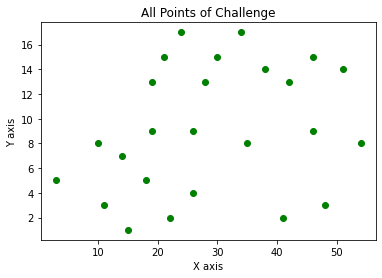

In [13]:
x = points['x']
y = points['y']
plt.title("All Points of Challenge")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(x, y, 'o', color='green');

In [14]:
### distribution distance / hops

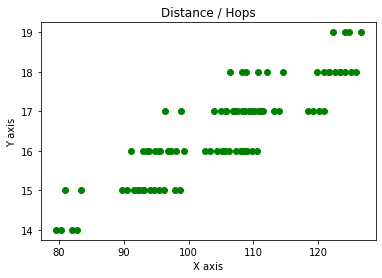

In [11]:
x = allWays['distance']
y = allWays['hops']
plt.title("Distance / Hops")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(x, y, 'o',color='green');